# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 처음으로 파일데이터에서 `상가(상권)정보_의료기관_201909`를 다운로드 받아봅니다.

In [37]:
# 이 부분은 colab 이 아니면 실행안해도 됩니다.
# colab에서 한글표시를 위해서 폰트 설치위해 코드 실행하기 :

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 필요한 라이브러리 불러오기

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 시각화를 위한 폰트 설정

In [39]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
plt.rc('font', family='NanumBarunGothic')

# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic')
# plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# retina 대신 svg 등의 설정을 할 수도 있으며
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## 데이터 로드하기
* 판다스에서 데이터를 로드할 때는 read_csv를 사용합니다.
* 데이터를 로드해서 df라는 변수에 담습니다.
* 그리고 shape 를 통해 데이터의 갯수를 찍습니다. 결과는 (행, 열) 순으로 출력됩니다.

In [40]:
# 소상공인시장진흥공단_상가업소정보_의료기관_201909.csv 데이터 다운로드하기
!gdown 18qFYiDJY_r_gZ1KY_zJukE8-GN5l4sR1

Downloading...
From: https://drive.google.com/uc?id=18qFYiDJY_r_gZ1KY_zJukE8-GN5l4sR1
To: /content/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv
100% 47.4M/47.4M [00:00<00:00, 131MB/s]


In [41]:
# 데이터 로드해 df 저장하기
df = pd.read_csv("소상공인시장진흥공단_상가업소정보_의료기관_201909.csv")                 # ... 코드 입력

# 데이터 형태 확인하기
df.shape              # ... 코드 입력

(91335, 39)

## 데이터 미리보기
* head, tail 을 통해 데이터를 미리 볼 수 있습니다.

In [42]:
# head 로 데이터를 미리보기 합니다.
df.head(1)          # ... 코드 입력

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [43]:
# tail 로 마지막 부분에 있는 데이터를 불러옵니다.
df.tail(1)         # ... 코드 입력

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


In [44]:
# sample 로 미리보기를 합니다.
df.sample()          # ... 코드 입력

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
65635,27719766,솔올이비인후과의원,NaN,S,의료,S01,병원,S01B14,이비인후과의원,Q86201,...,4215011000118810004000001,NaN,강원도 강릉시 교동광장로 115,210100.0,25512.0,NaN,3,NaN,128.877519,37.764942


## 데이터 요약하기

### 요약정보

In [45]:
# info로 데이터의 요약을 봅니다.
df.info()            # ... 코드 입력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### 컬럼명 보기

In [46]:
# 컬럼명만 출력해 봅니다.
df.columns             # ... 코드 입력

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 데이터 타입

In [47]:
# 데이터 타입만 출력합니다.
df.dtypes         # ... 코드 입력

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

# **결측치 확인후 결측치가 많은 컬럼 삭제하기**

## 1)결측치 확인하기

In [48]:
# isnull() 을 사용하여 결측치를 파악하세요.
df.isnull().sum()         # ... 코드 입력

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<Axes: >

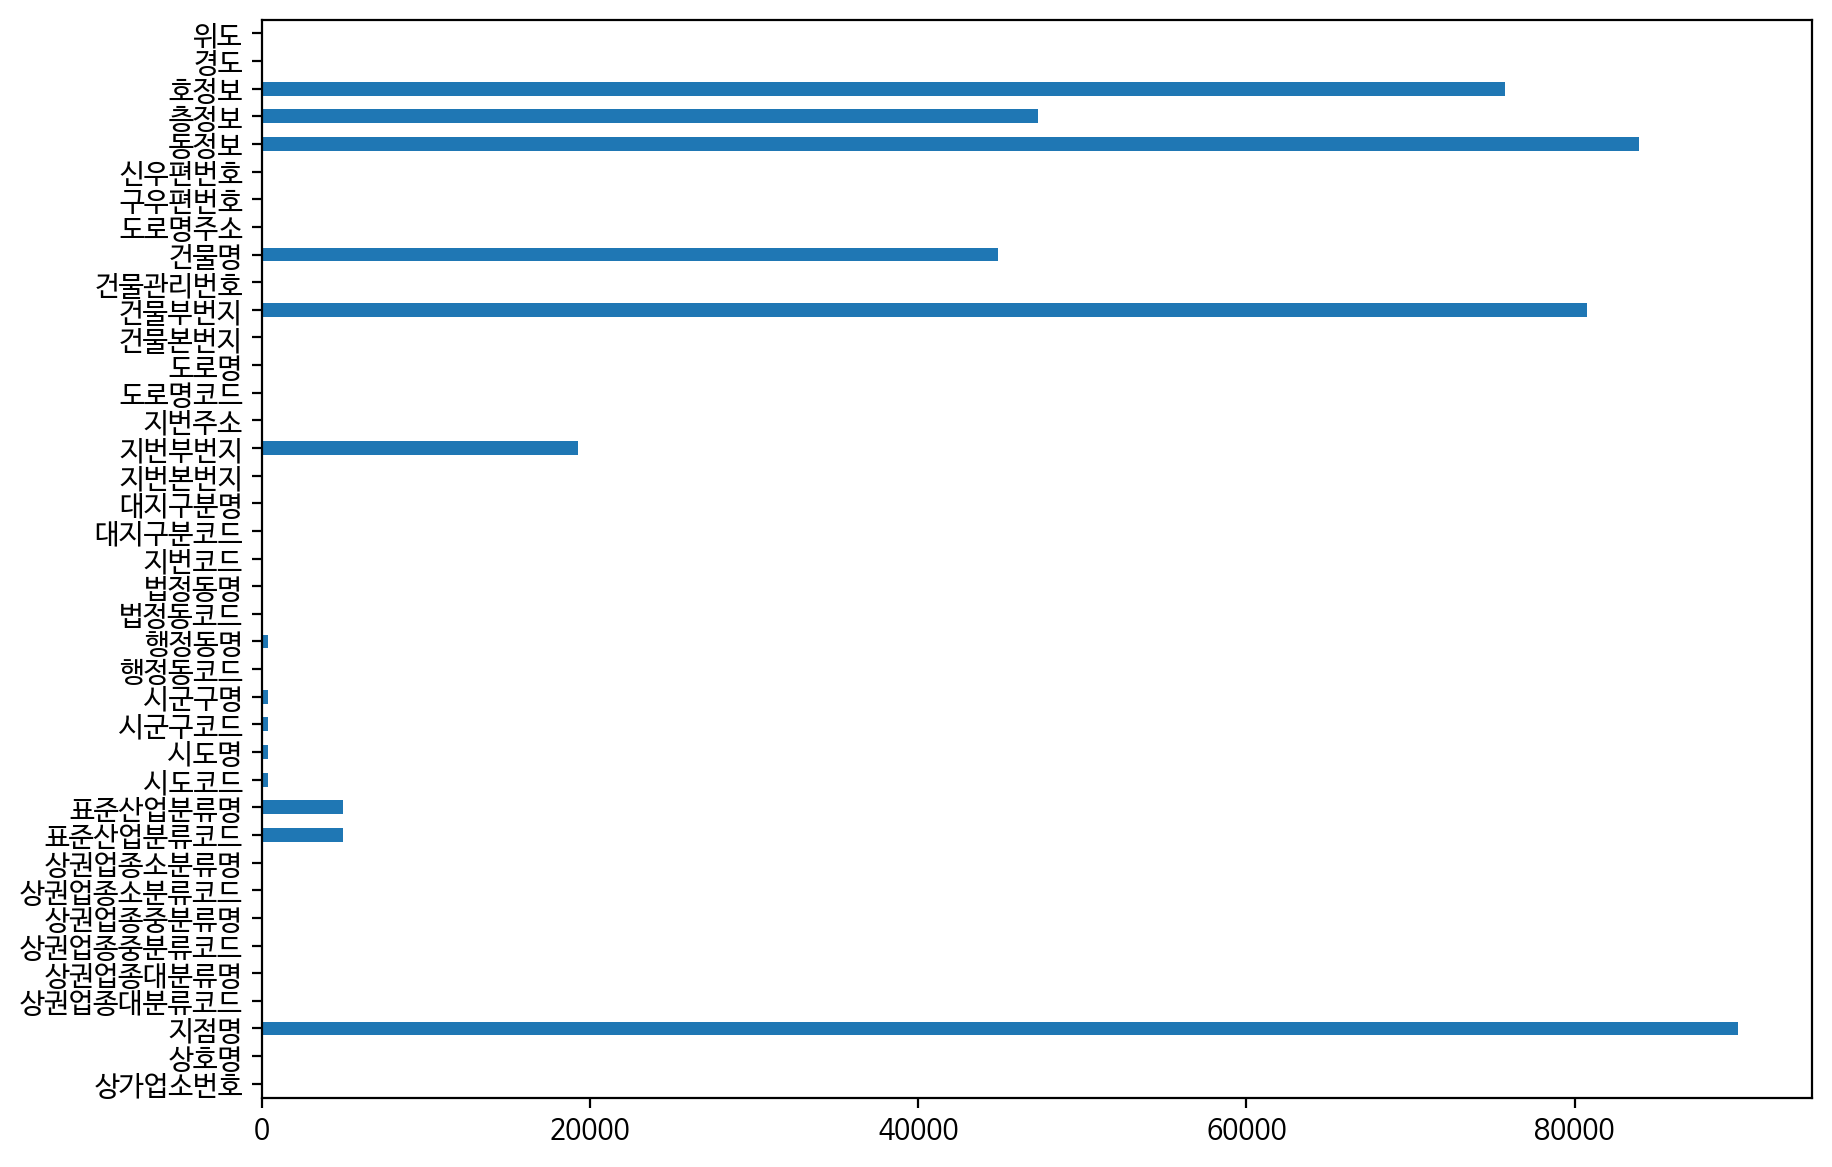

In [49]:
# 위에서 구한 결측치를 .plot.bar 를 통해 막대그래프로 표현합니다.
df.isnull().sum().plot.barh(figsize=(10, 7))

In [50]:
# 위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어 줍니다.
# df_null_count 변수에 결과를 담아서 head 로 미리보기를 합니다.
df_null_count = df.isnull().sum().reset_index()         # ... 코드 입력
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 2)컬럼명 변경하기

In [51]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경해 줍니다.
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 3)정렬하기

In [52]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_values 를 통해 정렬해서
# 결측치가 많은 순으로 상위 9개만 출력합니다.
df_null_head = df_null_count.sort_values(by=["결측치수"], ascending=False)         # ... 코드 입력
df_null_head.head(9)

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922


## 4)특정 컬럼만 불러오기

In [53]:
# 지점명 컬럼을 불러옵니다.
df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [54]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담습니다.
drop_columns = df_null_head["컬럼명"].values
drop_columns

array(['지점명', '동정보', '건물부번지', '호정보', '층정보', '건물명', '지번부번지', '표준산업분류코드',
       '표준산업분류명', '시도코드', '시군구코드', '시군구명', '행정동명', '시도명', '법정동코드', '법정동명',
       '구우편번호', '신우편번호', '건물관리번호', '건물본번지', '상가업소번호', '도로명주소', '도로명코드',
       '경도', '도로명', '지번코드', '지번주소', '지번본번지', '대지구분명', '대지구분코드', '상호명',
       '행정동코드', '상권업종소분류명', '상권업종소분류코드', '상권업종중분류명', '상권업종중분류코드',
       '상권업종대분류명', '상권업종대분류코드', '위도'], dtype=object)

In [55]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옵니다.
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드,...,대지구분코드,상호명,행정동코드,상권업종소분류명,상권업종소분류코드,상권업종중분류명,상권업종중분류코드,상권업종대분류명,상권업종대분류코드,위도
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0,...,1,하나산부인과,4127360000,산부인과,S01B10,병원,S01,의료,S,37.336344
1,NaN,NaN,NaN,NaN,4.0,NaN,14.0,Q86201,일반 의원,11.0,...,1,타워광명내과의원,1168065600,내과/외과,S01B07,병원,S01,의료,S,37.488742
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0,...,1,조정현신경외과의원,4139059100,신경외과,S01B15,병원,S01,의료,S,37.344955
3,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,NaN,26.0,...,1,한귀원정신과의원,2650078000,기타병원,S01B99,병원,S01,의료,S,35.166872
4,수지점,NaN,NaN,NaN,1.0,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0,...,1,더블유스토어수지점,4146551000,약국,S02A01,약국/한약방,S02,의료,S,37.323528


## 5)제거하기

In [56]:
type(df_null_head[:10]["컬럼명"].to_list())

list

In [57]:
print(df.shape)
# df_columns 삭제하기 : drop()

df = df.drop(columns=df_null_head[:9]["컬럼명"].to_list())         # ... 코드 입력
print(df.shape)

(91335, 39)
(91335, 30)


In [58]:
# df의 정보 확인하기 : info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도코드       90956 non-null  float64
 9   시도명        90956 non-null  object 
 10  시군구코드      90956 non-null  float64
 11  시군구명       90956 non-null  object 
 12  행정동코드      91335 non-null  int64  
 13  행정동명       90956 non-null  object 
 14  법정동코드      91280 non-null  float64
 15  법정동명       91280 non-null  object 
 16  지번코드       91335 non-null  int64  
 17  대지구분코드     91335 non-null  int64  
 18  대지구분명      91335 non-null  object 
 19  지번본번지      91335 non-null  int64  
 20  지번주소  

## 기초 통계값 보기

### 기초 통계 수치

In [60]:
# 위도 항목의 평균값
df["위도"].mean()         # ... 코드 입력

36.62471119236685

In [62]:
# 위도 항목의 중앙값
df["위도"].median()         # ... 코드 입력

37.2346523177033

In [63]:
# 위도 항목의 최댓값
df["위도"].max()          # ... 코드 입력

38.4996585705598

In [64]:
# 위도 항목의 최솟값
df["위도"].min()          # ... 코드 입력

33.2192896688307

In [65]:
# 위도 항목의 개수
df["위도"].count()          # ... 코드 입력

91335

### 기초통계값 요약하기 - describe

describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
기본적으로 수치형 데이터를 요약해서 보여줍니다.
데이터의 갯수, 평균, 표준편차, 최솟값,
1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.

In [66]:
# 위도를 describe로 요약해 봅니다.
df["위도"].describe()          # ... 코드 입력

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [69]:
# 2개의 컬럼(위도, 경도)을 describe 로 요약합니다.
df[["위도", "경도"]].describe()         # ... 코드 입력

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [81]:
df.loc[:, df.dtypes == "object"].head(1)

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
0,하나산부인과,S,의료,S01,병원,S01B10,산부인과,경기도,안산시 단원구,선부3동,선부동,대지,경기도 안산시 단원구 선부동 1081,경기도 안산시 단원구 달미로,4127310900110810000010857,경기도 안산시 단원구 달미로 10


In [83]:
# describe로 문자열 데이터타입의 describe로 요약합니다.

df.loc[:, df.dtypes == "object"].describe()         # ... 코드 입력

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


### 중복제거한 값 보기
* unique 로 중복을 제거한 값을 보고 nunique 로 갯수를 세어봅니다.

In [84]:
# 상권업종대분류명" 의 unique() 항목을 알아봅니다.
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [85]:
# "상권업종대분류명" nunique 로 갯수를 세어봅니다.
df["상권업종대분류명"].nunique()

1

In [86]:
# "상권업종중분류명" 의 unique() 항목을 알아봅니다.
df["상권업종중분류명"].unique()         # ... 코드 입력

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [87]:
# "상권업종중분류명" 의 nunique 로 갯수를 세어봅니다.
df["상권업종중분류명"].nunique()         # ... 코드 입력

5

In [88]:
# "상권업종소분류명" 의 unique() 항목을 알아봅니다.
df["상권업종소분류명"].unique()         # ... 코드 입력

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [89]:
# "상권업종소분류명" 의 nunique 로 갯수를 세어봅니다.
df["상권업종소분류명"].nunique()         # ... 코드 입력

34

In [90]:
# nunique 대신 len 을 사용할 수도 있습니다.
len(df["상권업종소분류명"].unique())

34

### 그룹화된 요약값 보기 - value_counts
* value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.

In [91]:
# value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.
# head()로 시도명 살펴보기.
df["시도명"].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [92]:
# 시도명을 세어봅니다.
df["시도명"].value_counts()

시도명
경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: count, dtype: int64

In [94]:
# value_counts()에 normalize=True 옵션을 사용하면 비율을 구할 수 있습니다.
df["시도명"].value_counts(normalize=True)         # ... 코드 입력

시도명
경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: proportion, dtype: float64

<Axes: ylabel='시도명'>

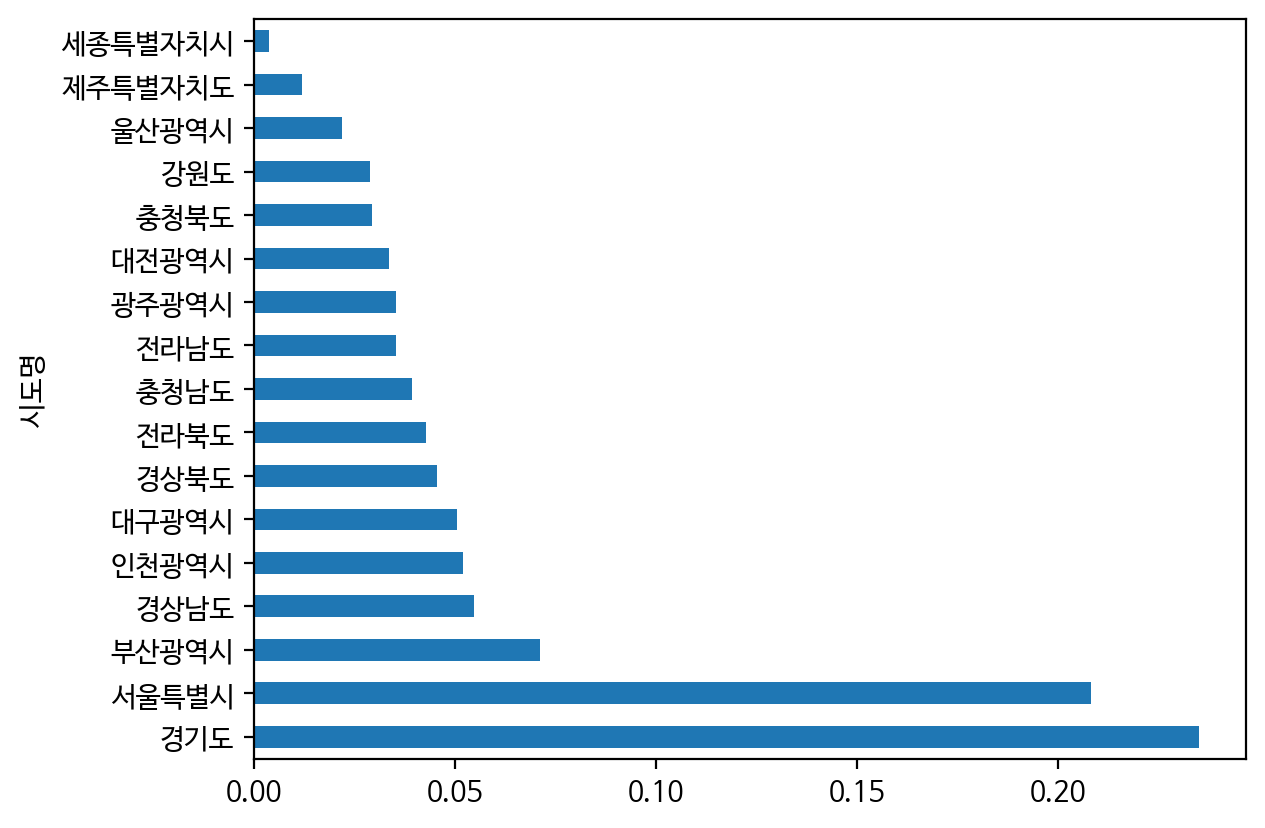

In [96]:
# Pandas 에는 plot기능을 내장하고 있습니다. ( "시도명" 경우는 막대차트가 더 효과적)
# 위에서 분석한 시도명 수를 막대그래프로 표현해 봅니다.
df["시도명"].value_counts(normalize=True).plot.barh()          # ... 코드 입력

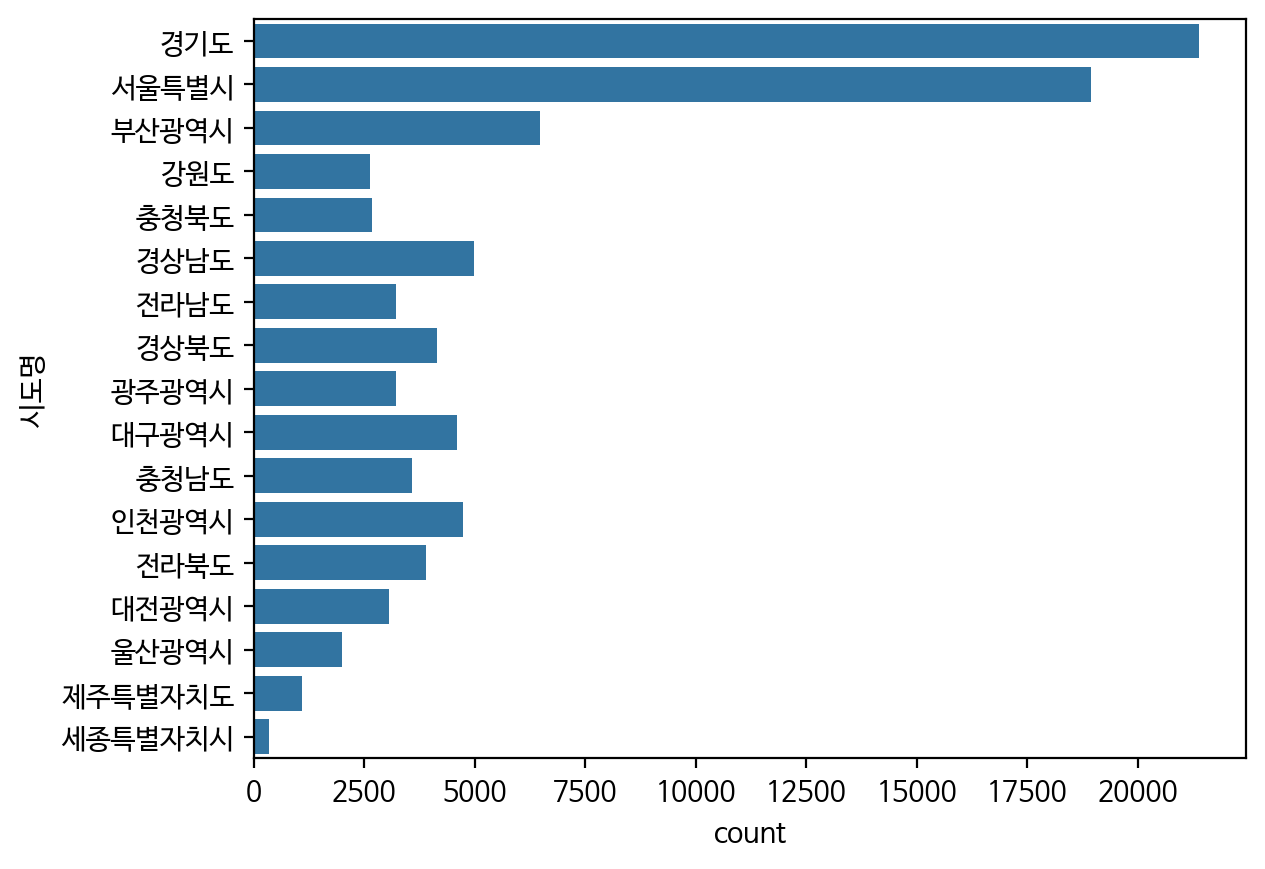

In [100]:
# seaborn의 countplot으로 "시도명" 에 대해 그려봅니다.
# countplot에서는  x나 y , hue 하나를 사용, 결과를 c에 저장하면 결과의 설명없이 표현해줌.
# sns.countplot(data=df, x = "시도명" )
c = sns.countplot(data=df, y = "시도명", )         # ... 코드 입력

In [101]:
# "상권업종대분류명"으로 갯수를 세어봅니다.
df["상권업종대분류명"].value_counts()

상권업종대분류명
의료    91335
Name: count, dtype: int64

In [102]:
# "상권업종중분류명"으로 갯수를 세어봅니다.
df["상권업종중분류명"].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [103]:
# normalize=True 를 사용해 비율을 구해봅니다.
df["상권업종중분류명"].value_counts(normalize=True)

상권업종중분류명
병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: proportion, dtype: float64

<Axes: ylabel='상권업종중분류명'>

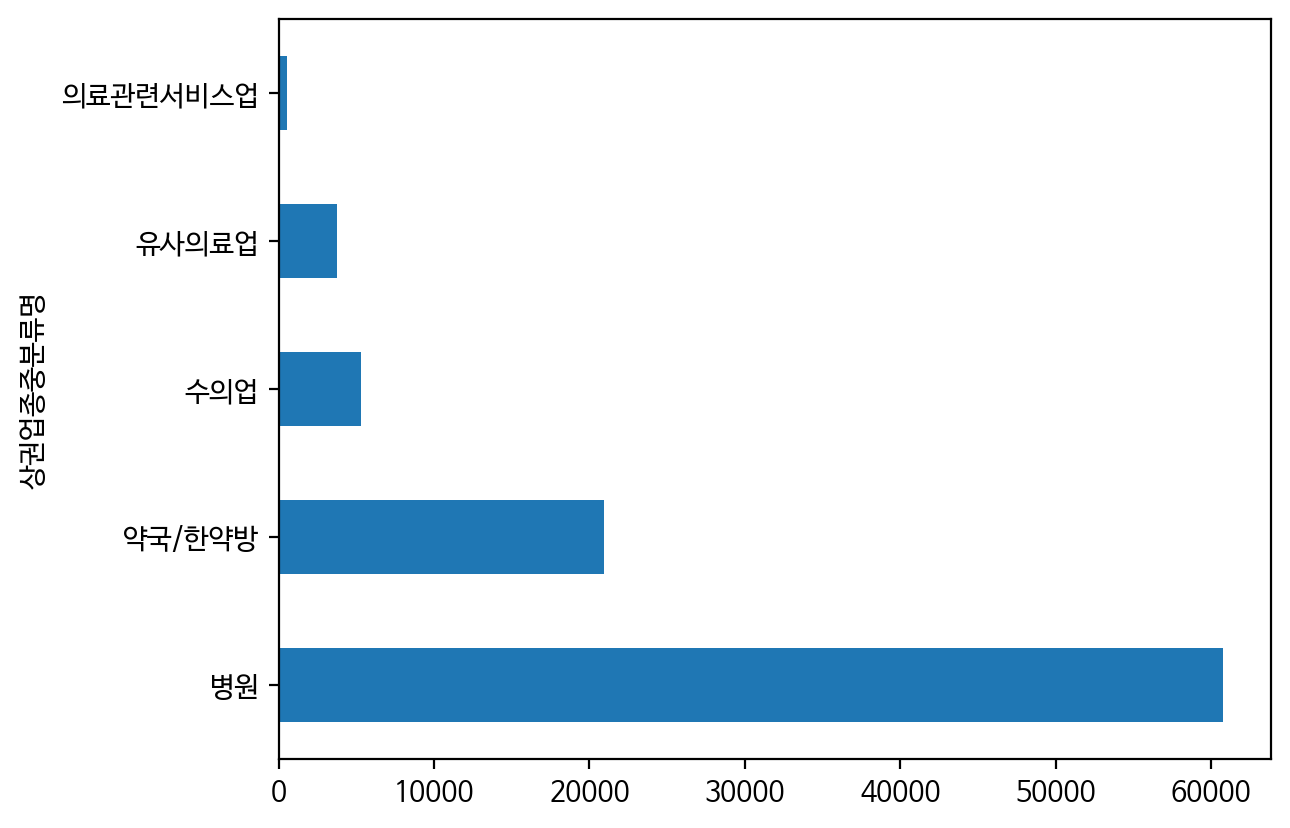

In [104]:
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다.
df["상권업종중분류명"].value_counts().plot.barh()

<Axes: ylabel='count'>

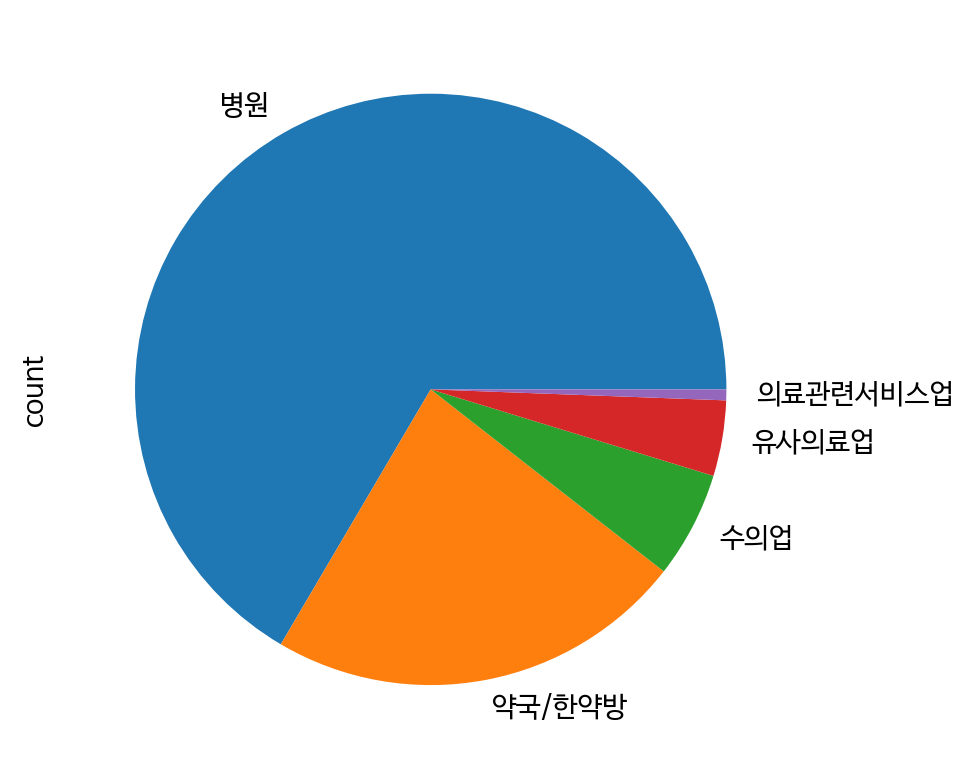

In [105]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
df["상권업종중분류명"].value_counts().plot.pie()

In [106]:
# "상권업종소분류명" 에 대한 그룹화 된 값을 카운트 합니다.
df["상권업종소분류명"].value_counts()         # ... 코드 입력

상권업종소분류명
약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: count, dtype: int64

<Axes: ylabel='상권업종소분류명'>

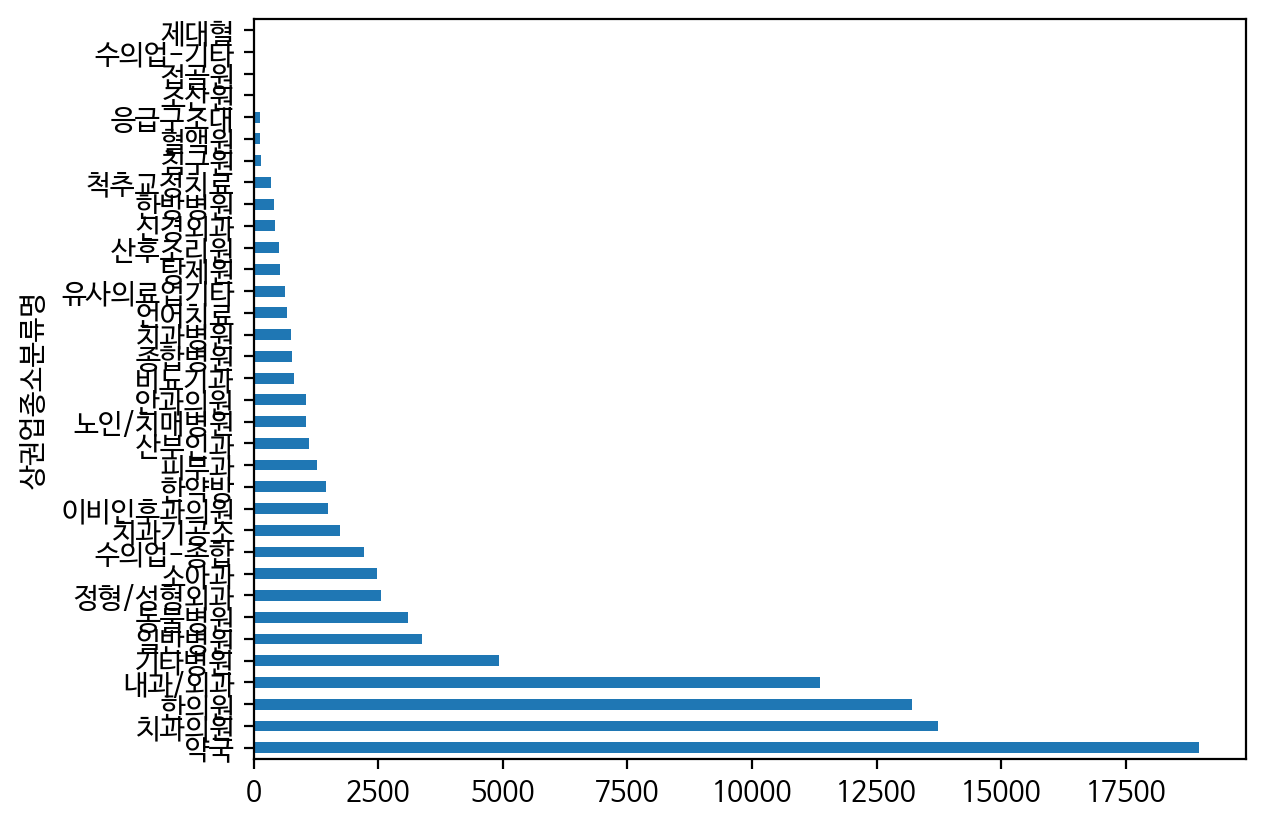

In [108]:
# "상권업종소분류명"으로 갯수를 세어봅니다.
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다.
df["상권업종소분류명"].value_counts().plot.barh()         # ... 코드 입력

## 데이터 색인하기
* 특정 데이터만 모아서 따로 봅니다.

In [116]:
# "상권업종중분류명"이 "약국/한약방"인 데이터만 가져와서
# df_medical 이라는 변수에 담아봅니다.
# 그리고 head()를 통해 미리보기를 합니다.
df_medical = df[df["상권업종중분류명"]=="약국/한약방"]         # ... 코드 입력
df_medical.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528


In [117]:
# "상권업종대분류명" 에서 "의료"만 가져옵니다.
# df.loc를 사용하면 행,열을 함께 가져올 수 있습니다.
# 이 기능을 통해 "상권업종중분류명" 만 가져옵니다.
# 그리고 가져온 결과를 value_counts 를 통해 중분류의 갯수를 세어봅니다.
# shop_type 결과를 저장하기
shop_type = (df["상권업종대분류명"] == "의료")
df.loc[shop_type, "상권업종중분류명"].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [ ]:
# 위와 똑같은 기능을 수행하는 코드입니다. 아래와 같이 한 줄에 표현할 수도 있습니다.
# df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

In [120]:
# 유사의료업만 따로 모아 df_medi 에 저장하기.. shape으로 크기 확인하기
cond1 = (df["상권업종중분류명"] == "유사의료업")

df_medi = df.loc[cond1]         # ... 코드 입력
df_medi.shape

(3774, 30)

In [122]:
# df의 상호명을  value_counts 를 사용해서 상위 10개를 출력합니다.
df["상호명"].value_counts().head(10)         # ... 코드 입력

상호명
리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: count, dtype: int64

In [124]:
# 유사의료업만 df_medi 변수에 담겨져 있습니다.
# df_medi 변수에서 상호명으로 갯수를 세어봅니다.
# 가장 많은 상호 상위 10개를 출력해 봅니다.
df_medi["상호명"].value_counts().head(10)         # ... 코드 입력

상호명
리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: count, dtype: int64

# **서울특별시에 구별로 약국이 몇개 있는지 파악하기**

### 여러 조건으로 색인하기
* and == & , or == | 사용

In [129]:
# "상권업종소분류명"이 "약국" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
# 결과를 df_seoul_drug 에 저장하기
df_seoul_drug = df[(df["상권업종소분류명"]=="약국") & (df["시도명"]=="서울특별시")]   # ... 코드 입력
df_seoul_drug.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656


### 구별로 보기

In [130]:
# 위에서 색인한 데이터로 "시군구명"으로 그룹화 해서 갯수를 세어봅니다.
# 구별로 약국이 몇개가 있는지 확인해 봅니다.
df_seoul_drug["시군구명"].value_counts()

시군구명
강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
노원구     169
성북구     160
은평구     151
영등포구    145
강서구     136
마포구     136
중랑구     129
서대문구    120
관악구     118
강동구     117
종로구     111
양천구     109
중구      106
강북구     104
구로구     102
동작구      96
성동구      88
용산구      87
금천구      85
도봉구      84
Name: count, dtype: int64

In [131]:
# normalize=True 를 통해 비율을 구해봅니다.
df_seoul_drug["시군구명"].value_counts(normalize=True)

시군구명
강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
노원구     0.047220
성북구     0.044705
은평구     0.042191
영등포구    0.040514
강서구     0.037999
마포구     0.037999
중랑구     0.036044
서대문구    0.033529
관악구     0.032970
강동구     0.032691
종로구     0.031014
양천구     0.030455
중구      0.029617
강북구     0.029058
구로구     0.028500
동작구     0.026823
성동구     0.024588
용산구     0.024308
금천구     0.023750
도봉구     0.023470
Name: proportion, dtype: float64

<Axes: xlabel='시군구명'>

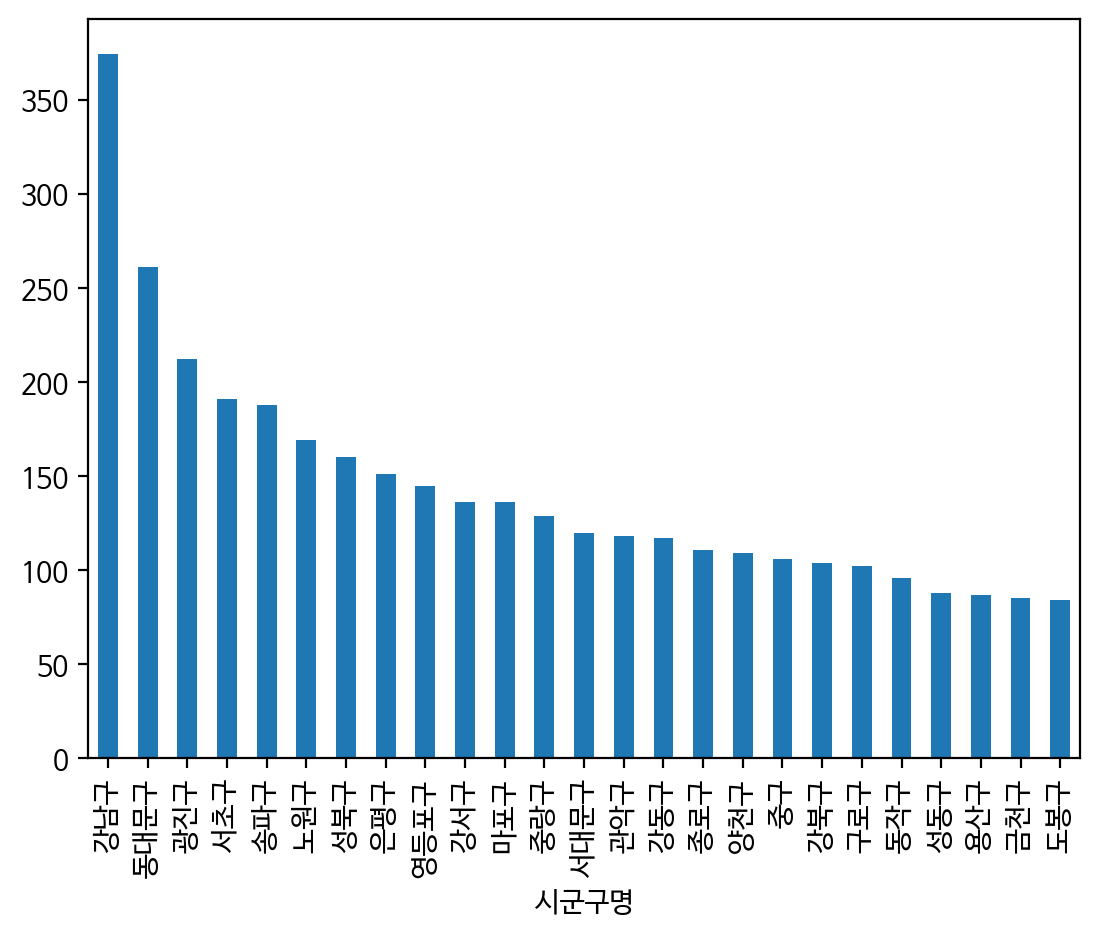

In [132]:
# 위에서 구한 결과를 판다스의 plot.bar()를 활용해 막대그래프로 그립니다.
df_seoul_drug["시군구명"].value_counts().plot.bar()

# **서울특별시에 구별로 종합병원이 몇개 있는지 파악하기**

In [134]:
# "상권업종소분류명"이 "종합병원" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
df_seoul_hospital = df[
    (df["상권업종소분류명"]=="종합병원") &
    (df["시도명"]=="서울특별시")]           # ... 코드 입력
df_seoul_hospital.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,서울특별시 광진구 중곡동 58-25,112153104006,서울특별시 광진구 긴고랑로,119,1121510100100580025000733,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048


In [135]:
# "시군구명" 으로 그룹화 해서 구별로 종합병원의 수를 세어봅니다.
df_seoul_hospital["시군구명"].value_counts()

시군구명
강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: count, dtype: int64

### 텍스트 데이터 색인하기

In [136]:
# str.contains 를 사용해서 "상호명"에 "대학병원"이 들어가는 것을 가져와서 head()로 미리보기 합니다.
df[df["상호명"].str.contains("대학병원")].head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
193,23651380,동국대학병원일산,S,의료,S01,병원,S01B01,종합병원,41.0,경기도,...,경기도 고양시 일산동구 식사동 814,412853193010,경기도 고양시 일산동구 동국로,27,4128510100108090004022480,경기도 고양시 일산동구 동국로 27,410773.0,10326.0,126.805548,37.676425


In [ ]:
# "상호명"에 종합병원이 아닌 데이터를 찾아 unique() 로 결과 보기
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"), "상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [142]:
# 상호명에서 특정 단어가 들어가는 데이터만 가져옵니다 - 꽃배달 => 종합병원이라고 보기 어려운경우
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")] # ... 코드 입력

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,서울특별시 서초구 반포동 551,116504163330,서울특별시 서초구 사평대로28길,55,1165010700105510000017194,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,서울특별시 서초구 반포동 547-6,116504163242,서울특별시 서초구 반포대로39길,56,1165010700105470006016762,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,127.001756,37.499095


In [143]:
# 상호명에서 특정 단어가 들어가는 데이터만 가져옵니다 - 료기 => 종합병원이라고 보기 어려운경우
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("료기")]                # ... 코드 입력

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296


In [144]:
# "꽃배달|의료기|장례식장|상담소|어린이집"은 종합병원과 무관하기 때문에 전처리위해 해당 텍스트를 한번에 검색
# 제거할 데이터의 인덱스만 drop_row에 담아주고 list 형태로 반환합니다.

drop_row = df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index
drow_row = drop_row.tolist()
drop_row

Index([1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177], dtype='int64')

In [145]:
# 의원으로 끝나는 데이터도 종합병원으로 볼 수 없기 때문에 인덱스를 찾아서
# drop_row2 에 담아주고 list 형태로 변환하기
drop_row2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drow_row2 = drop_row2.tolist()
drop_row2

Index([ 8479, 12854, 13715, 14966, 16091, 18047, 20200, 20415, 30706, 32889,
       34459, 34720, 35696, 37251, 45120, 49626, 51575, 55133, 56320, 56404,
       56688, 57551, 62113, 76508],
      dtype='int64')

In [146]:
# drop_row2를 삭제할 행 drop_row에 합쳐줍니다. ( + 대신에 union 사용)
# drop_row = drop_row + drop_row2 에러 발생
# drop_row 갯수 확인하기 : len() 사용 => 결과의 33 이 종합병원으로 보기 어려움
drop_row = drop_row.union(drop_row2)
len(drop_row)

33

In [147]:
# 해당 셀을 삭제하고 삭제 전과 후의 행의 갯수를 비교합니다.
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis=0)
print(df_seoul_hospital.shape)

(91, 30)
(58, 30)


In [148]:
# 서울지역 종합병원에 대한 전처리 결과 확인하기
df_seoul_hospital["상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '고려대학교구로병원', '학교법인일송학원', '희명스포츠의학센터인공신장실',
       '연세대학교의과대학강남세브란스', '국립정신병원', '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원',
       '영동세브란스병원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울대학교병원비상계획외래',
       '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '우신향병원', '동부제일병원', '아산재단금강병원',
       '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원',
       '한국건강관리협회서울특', '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', 'Y&T성모마취과',
       '영남의료재단', '인제대학교서울백병원', '한국필의료재단', '사랑의병원', '성삼의료재단미즈메디병원',
       '씨엠충무병원', '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'], dtype=object)

In [149]:
# 이 부분은 흐름에 관계없음- 연습
# str.startswith 를 사용해 "서울"로 시작하는 도로명주소를 가져와서 head()로 미리보기 합니다.
df[df["도로명주소"].str.startswith("서울")].head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,11.0,서울특별시,...,서울특별시 강남구 도곡동 467-14,116804166604,서울특별시 강남구 언주로30길,39,1168011800104670014000001,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742


In [150]:
# 이 부분은 흐름에 관계없음- 연습
# str.endswith를 사용해서 "상호명"이 "병원"으로 끝나는 데이터를 가져와서 head()로 미리보기 합니다.
df[df["상호명"].str.endswith("병원")].head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
5,20809147,행신동물병원,S,의료,S04,수의업,S04A02,동물병원,41.0,경기도,...,경기도 고양시 덕양구 행신동 647-14,412813192072,경기도 고양시 덕양구 행신로,147,4128112800106470014011094,경기도 고양시 덕양구 행신로 147,412220.0,10517.0,126.831632,37.619309


### 특정 지역만 보기

In [151]:
# 서울에 있는 데이터의 위도와 경도를 봅니다.
# 결과를 df_seoul 이라는 데이터프레임에 저장합니다.
# 새로운 변수에 데이터프레임을 저장시 copy()를 사용합니다.
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(18943, 30)

<Axes: xlabel='시군구명'>

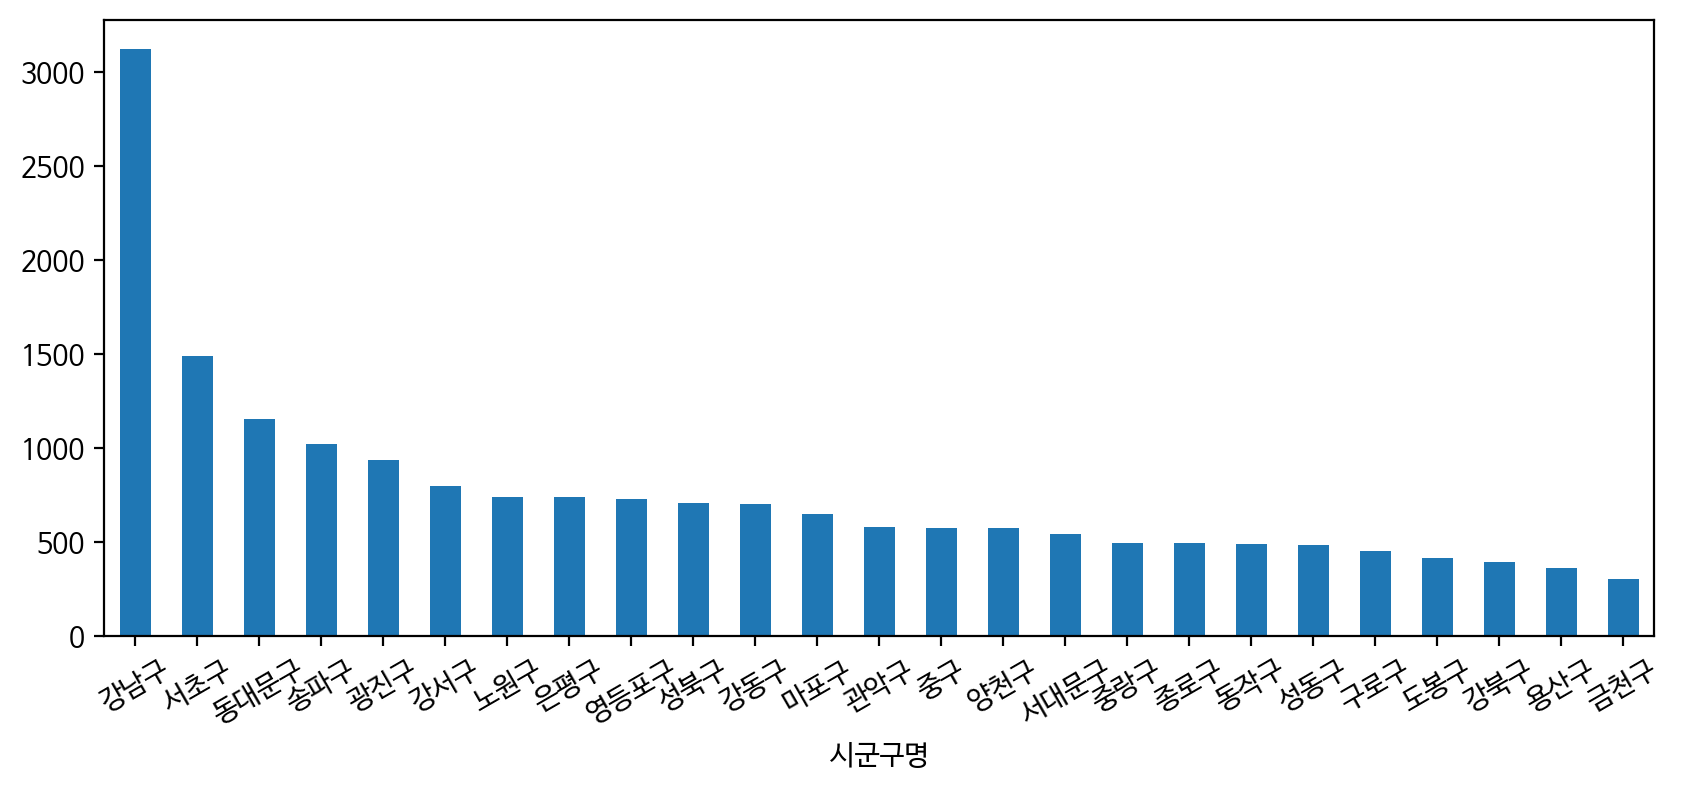

In [152]:
# 위에서 만든 df_seoul 데이터프레임의 시군구명을 시각화 plot 합니다.
df_seoul["시군구명"].value_counts().plot.bar(figsize=(10,4), rot=30)

<Axes: xlabel='count', ylabel='시군구명'>

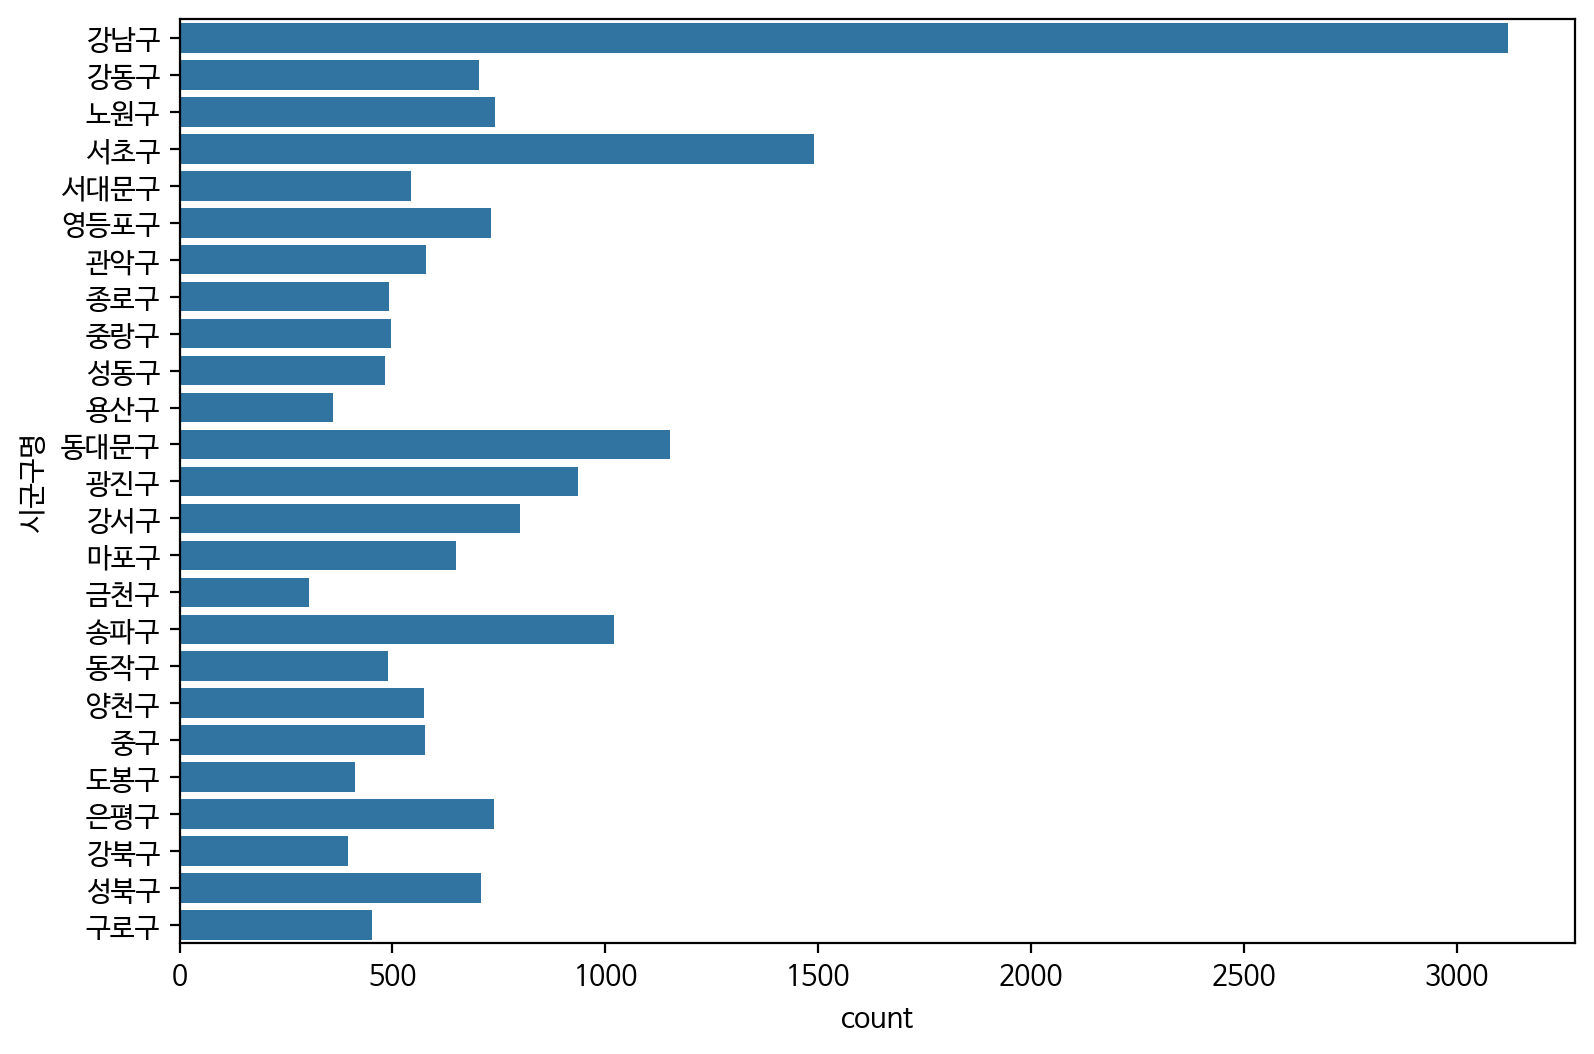

In [153]:
# seaborn 의 countplot 을 사용해서 위에서 만든 df_seoul 데이터프레임의
# 시군구명을 시각화 합니다.
plt.figure(figsize=(9, 6))
sns.countplot(data=df_seoul, y="시군구명")

<Axes: xlabel='경도', ylabel='위도'>

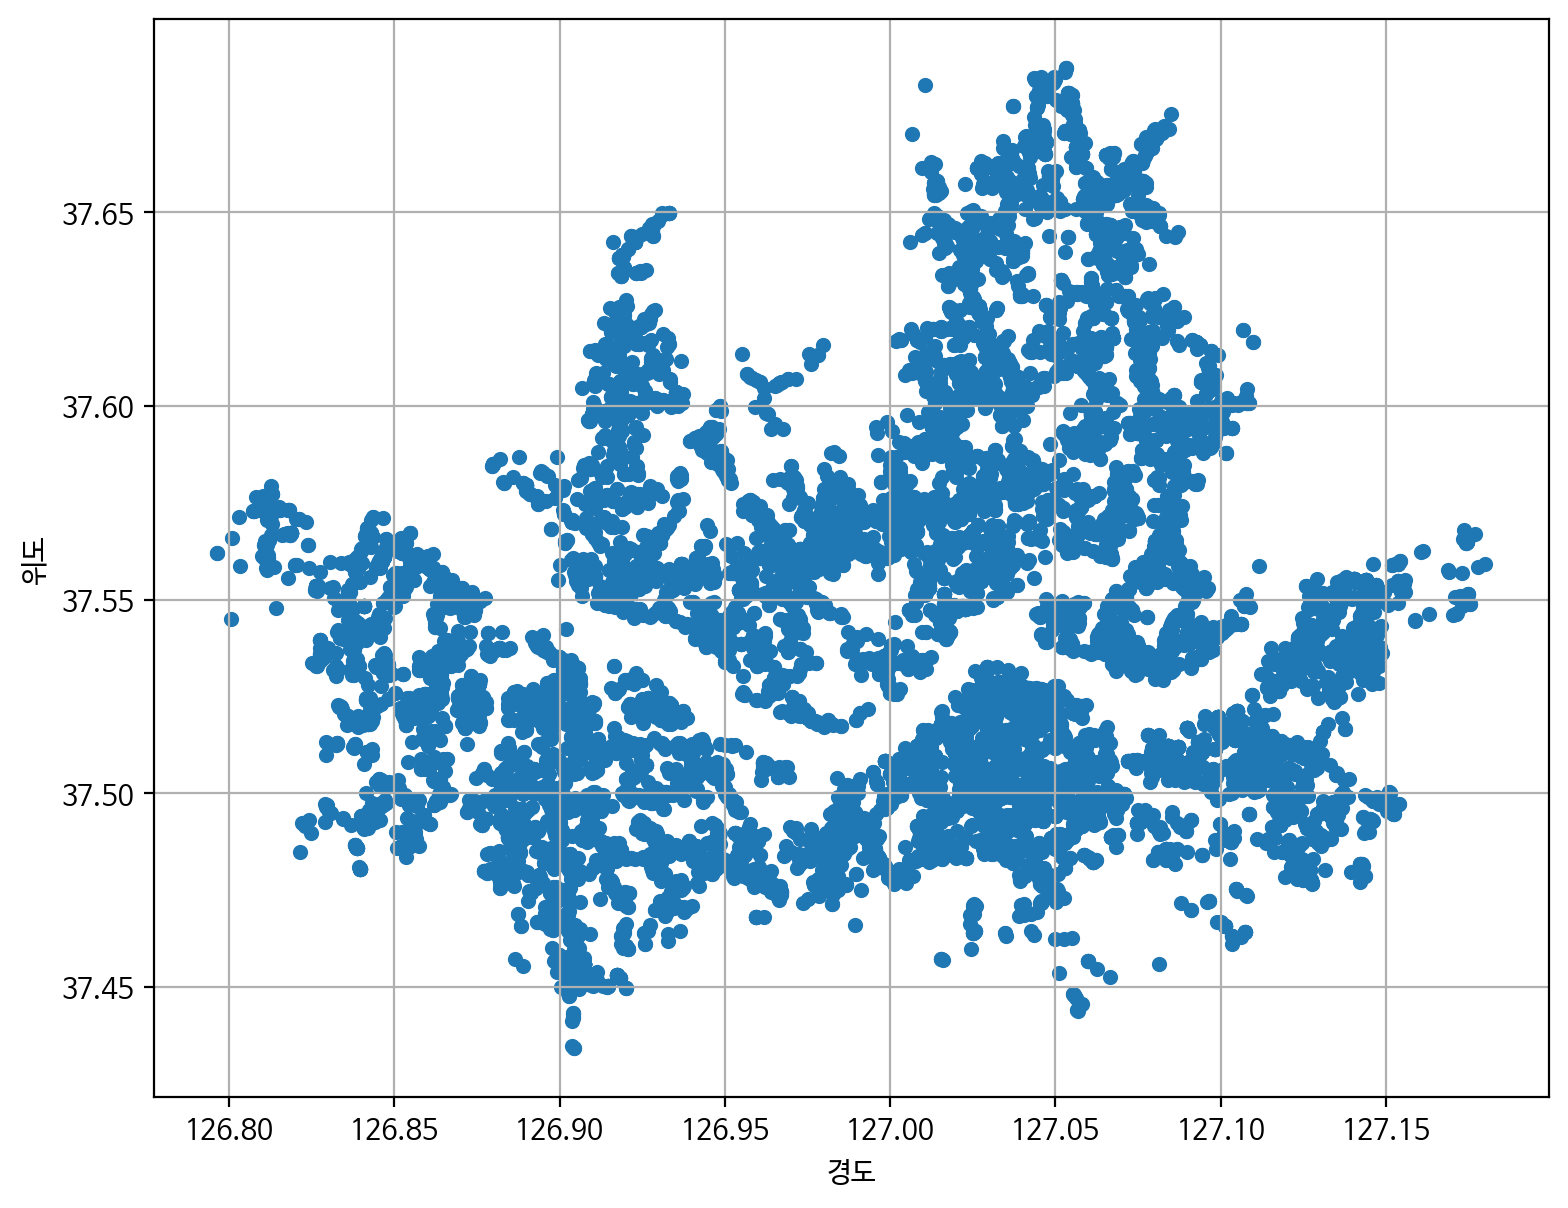

In [154]:
# Pandas 의 plot.scatter 를 통해 경도와 위도를 표시해 봅니다.
df_seoul[["경도", "위도", "시군구명"]].plot.scatter(
    x="경도", y="위도", figsize=(9, 7), grid=True)

In [155]:
# seaborn의 scatterplot 을 통해 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_seoul,
                x='경도', y='위도', hue='시군구명')

Output hidden; open in https://colab.research.google.com to view.

In [156]:
# seaborn의 scatterplot 을 통해 "상권업종중분류명" 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_seoul,
                x='경도', y='위도', hue="상권업종중분류명")

Output hidden; open in https://colab.research.google.com to view.

<Axes: xlabel='경도', ylabel='위도'>

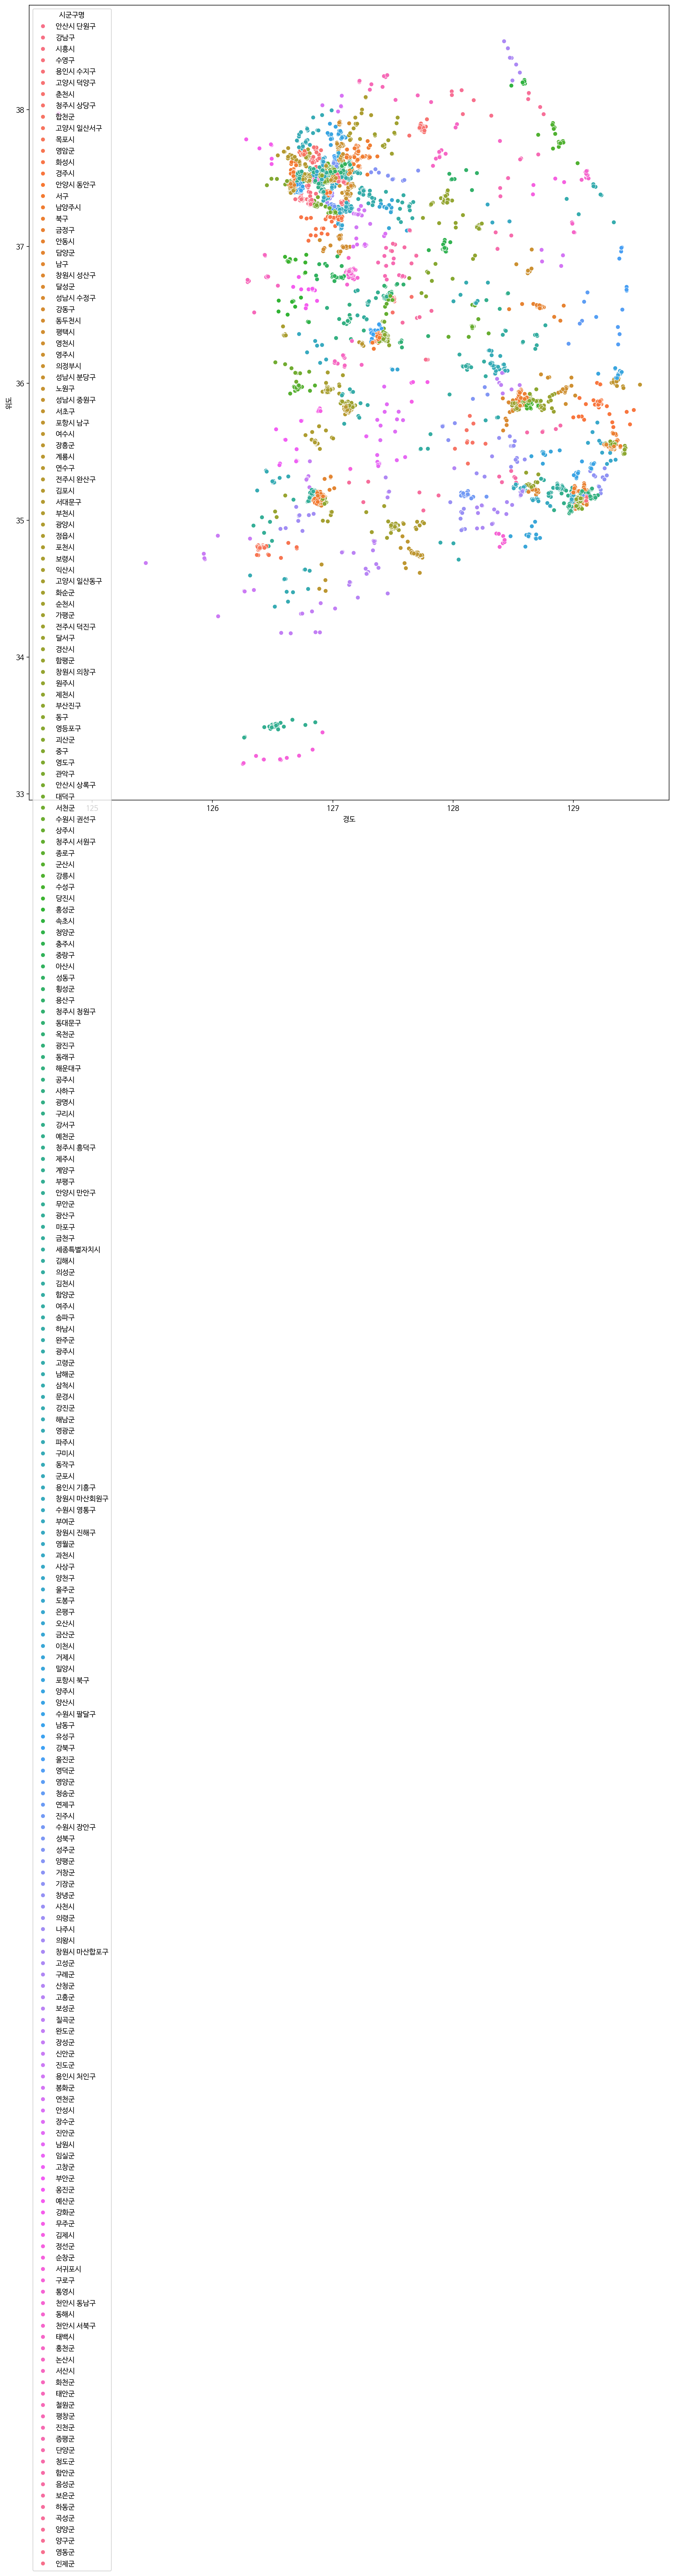

In [158]:
# seaborn의 scatterplot 을 통해 전국 데이터(df)로 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 20))
sns.scatterplot(data=df[:10000],
                x='경도', y='위도', hue='시군구명')


## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://t1.daumcdn.net/cfile/tistory/99576B4A5B751DC902">

검은색 프롬프트 창에 아래 명령어를 통해 folium 을 설치합니다.


`conda install -c conda-forge folium`

### Folium 사용예제
https://python-visualization.github.io/folium/latest/getting_started.html
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/main/examples/


In [159]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium
# 지도 시각화를 위한 라이브러리 가져오기 한 후 세계지도 나타내기
import folium
folium.Map()

In [160]:
# geo_df 에 df_seoul_hospital 을 copy() 로 복사해서 할당합니다.
geo_df = df_seoul_hospital.copy()

In [161]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다.
print(geo_df["위도"].mean())
print(geo_df["경도"].mean())

37.52972276355593
126.9963589356625


In [162]:
# 특정 지역을 나타내려면 location 에 위,경도 값 입력하고 지도에 나타냅니다.
fmap = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()],
                 zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    # 상호명과 주소를 붙여서 출력되도록 합니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']

    folium.Marker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        popup=popup_name,
        tooltip=popup_name
    ).add_to(fmap)


fmap

In [163]:
# 네이버지도 타일 설정
tiles = "https://map.pstatic.net/nrb/styles/basic/1694139974/{z}/{x}/{y}.png?mt=bg.ol.ts.lko"
# 속성 설정
attr = "Naver"
# 지도 객체 생성
m = folium.Map(location = [lat, lon],
               zoom_start = zoom_size,
               tiles = tiles,
               attr = attr)
folium.Marker(location = [lat, lon]).add_to(m)

NameError: name 'lat' is not defined

## 좀 더 분석해 보기
* 상권업종중분류명, 상권업종소분류명 중에 관심 있는 분류명을 색인 후에 시도별, 시군구별 분석을 해보세요.
* 예시)
    * 언어치료는 시군구별로 어디에 많이 위치할까?
    * 의료시설은 서울과 강남에 집중되어 있을까?
    * 강남에는 피부과, 성형외과가 다른 지역에 비해 많을까?